In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

## Data Cleaning

### Food Access Dataset

In [2]:
df_food = pd.read_excel('FoodAccessResearchAtlasData2019.xlsx', sheet_name = 'Food Access Research Atlas')
df_food

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,57.0,1.713770,0,...,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,56043000301,Wyoming,Washakie County,1,2665,1154,0,10.0,0.375235,0,...,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,56043000302,Wyoming,Washakie County,1,2542,1021,0,73.0,2.871755,0,...,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,56045951100,Wyoming,Weston County,0,3314,1322,0,252.0,7.604104,0,...,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0


In [3]:
df_food.isna().sum()

CensusTract      0
State            0
County           0
Urban            0
Pop2010          0
                ..
TractAIAN        4
TractOMultir     4
TractHispanic    4
TractHUNV        4
TractSNAP        4
Length: 147, dtype: int64

In [4]:
df_food.isna().sum().sum()

np.int64(4330227)

In [5]:
df_nulls = df_food[df_food.isna().any(axis=1)]

columns_with_nulls = df_nulls.columns[df_nulls.isna().any()].tolist()

In [6]:
columns_with_nulls

['NUMGQTRS',
 'PCTGQTRS',
 'PovertyRate',
 'MedianFamilyIncome',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lapop1',
 'lapop1share',
 'lalowi1',
 'lalowi1share',
 'lakids1',
 'lakids1share',
 'laseniors1',
 'laseniors1share',
 'lawhite1',
 'lawhite1share',
 'lablack1',
 'lablack1share',
 'laasian1',
 'laasian1share',
 'lanhopi1',
 'lanhopi1share',
 'laaian1',
 'laaian1share',
 'laomultir1',
 'laomultir1share',
 'lahisp1',
 'lahisp1share',
 'lahunv1',
 'lahunv1share',
 'lasna

In [7]:
columns_to_impute = [col for col in df_food.columns if 'la' in col[:2] or "LA" in col[:2]]

for col in columns_to_impute[8:]:
    print(df_food[col].isna().sum())

29957
14540
35914
29957
14540
35914
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4568
4562
4568
4562
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19989
19966
19989
19966
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64765
64666
64765
64666
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
71025
70920
71025
70920


In [8]:
df_food['NUMGQTRS'] = df_food['NUMGQTRS'].fillna(-1)
df_food['PCTGQTRS'] = df_food['PCTGQTRS'].fillna(-1)
df_food['PovertyRate'] = df_food['PovertyRate'].fillna(-1)
df_food['MedianFamilyIncome'] = df_food.groupby('County')['MedianFamilyIncome'].transform(lambda x: x.fillna(x.mean()))

### Death by County Dataset 

In [9]:
df_death = pd.read_excel('Underlying Cause of Death, 2018-2023, Single Race.xlsx')
df_death

,County,County Code,Deaths,Population,"Crude Rate per 100,000"
0,"Autauga County, AL",1001.0,35,55869,62.6
1,"Baldwin County, AL",1003.0,108,223234,48.4
2,"Barbour County, AL",1005.0,11,24686,Unreliable
3,"Blount County, AL",1009.0,18,57826,Unreliable
4,"Butler County, AL",1013.0,24,19448,123.4
...,...,...,...,...,...
1985,"Natrona County, WY",56025.0,39,79858,48.8
1986,"Park County, WY",56029.0,11,29194,Unreliable
1987,"Sheridan County, WY",56033.0,10,30485,Unreliable
1988,"Sweetwater County, WY",56037.0,21,42343,49.6


In [10]:
df_death['State_only'] = df_death['County'].str.split(", ").str[1]
df_death['County_only'] = df_death['County'].str.split(", ").str[0]
df_death

,County,County Code,Deaths,Population,"Crude Rate per 100,000",State_only,County_only
0,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County
1,"Baldwin County, AL",1003.0,108,223234,48.4,AL,Baldwin County
2,"Barbour County, AL",1005.0,11,24686,Unreliable,AL,Barbour County
3,"Blount County, AL",1009.0,18,57826,Unreliable,AL,Blount County
4,"Butler County, AL",1013.0,24,19448,123.4,AL,Butler County
...,...,...,...,...,...,...,...
1985,"Natrona County, WY",56025.0,39,79858,48.8,WY,Natrona County
1986,"Park County, WY",56029.0,11,29194,Unreliable,WY,Park County
1987,"Sheridan County, WY",56033.0,10,30485,Unreliable,WY,Sheridan County
1988,"Sweetwater County, WY",56037.0,21,42343,49.6,WY,Sweetwater County


In [11]:
df_death.isna().sum()

County                    1
County Code               1
Deaths                    0
Population                0
Crude Rate per 100,000    0
State_only                1
County_only               1
dtype: int64

In [12]:
df_death.isna().sum().sum()

np.int64(4)

In [13]:
df_death = df_death.dropna()
df_death

,County,County Code,Deaths,Population,"Crude Rate per 100,000",State_only,County_only
0,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County
1,"Baldwin County, AL",1003.0,108,223234,48.4,AL,Baldwin County
2,"Barbour County, AL",1005.0,11,24686,Unreliable,AL,Barbour County
3,"Blount County, AL",1009.0,18,57826,Unreliable,AL,Blount County
4,"Butler County, AL",1013.0,24,19448,123.4,AL,Butler County
...,...,...,...,...,...,...,...
1984,"Laramie County, WY",56021.0,51,99500,51.3,WY,Laramie County
1985,"Natrona County, WY",56025.0,39,79858,48.8,WY,Natrona County
1986,"Park County, WY",56029.0,11,29194,Unreliable,WY,Park County
1987,"Sheridan County, WY",56033.0,10,30485,Unreliable,WY,Sheridan County


In [14]:
df_death.dtypes

County                     object
County Code               float64
Deaths                      int64
Population                  int64
Crude Rate per 100,000     object
State_only                 object
County_only                object
dtype: object

In [15]:
df_death['Crude Rate per 100,000'] = df_death['Crude Rate per 100,000'].apply(lambda x: 0.00 if x == 'Unreliable' else x)
df_death['Crude Rate per 100,000'] = df_death['Crude Rate per 100,000'].astype('float')

/var/folders/7g/xw6rhgc51gzc64y3603lftr40000gn/T/ipykernel_43502/2707181817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death['Crude Rate per 100,000'] = df_death['Crude Rate per 100,000'].apply(lambda x: 0.00 if x == 'Unreliable' else x)
/var/folders/7g/xw6rhgc51gzc64y3603lftr40000gn/T/ipykernel_43502/2707181817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death['Crude Rate per 100,000'] = df_death['Crude Rate per 100,000'].astype('float')


In [16]:
df_death['State_only'] = df_death['State_only'].astype('category')

/var/folders/7g/xw6rhgc51gzc64y3603lftr40000gn/T/ipykernel_43502/3469385370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death['State_only'] = df_death['State_only'].astype('category')


### Merging Datasets

In [17]:
df_merged = df_death.merge(df_food, how = 'inner', left_on = 'County_only', right_on = 'County')
df_merged

,County_x,County Code,Deaths,Population,"Crude Rate per 100,000",State_only,County_only,CensusTract,State,County_y,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County,1001020100,Alabama,Autauga County,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County,1001020200,Alabama,Autauga County,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County,1001020300,Alabama,Autauga County,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County,1001020400,Alabama,Autauga County,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,"Autauga County, AL",1001.0,35,55869,62.6,AL,Autauga County,1001020500,Alabama,Autauga County,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223680,"Sweetwater County, WY",56037.0,21,42343,49.6,WY,Sweetwater County,56037970903,Wyoming,Sweetwater County,...,136.0,2306.0,84.0,29.0,8.0,22.0,392.0,611.0,17.0,127.0
223681,"Sweetwater County, WY",56037.0,21,42343,49.6,WY,Sweetwater County,56037971000,Wyoming,Sweetwater County,...,204.0,1866.0,13.0,11.0,0.0,20.0,254.0,436.0,11.0,39.0
223682,"Sweetwater County, WY",56037.0,21,42343,49.6,WY,Sweetwater County,56037971100,Wyoming,Sweetwater County,...,497.0,2969.0,27.0,36.0,5.0,22.0,262.0,420.0,8.0,47.0
223683,"Sweetwater County, WY",56037.0,21,42343,49.6,WY,Sweetwater County,56037971200,Wyoming,Sweetwater County,...,405.0,2350.0,20.0,20.0,1.0,20.0,113.0,234.0,0.0,8.0


## EDA

### Ellie EDA

In [18]:
df_merged.columns.to_list()
df_merged['LILATracts_1And10'].unique()

array([0, 1])

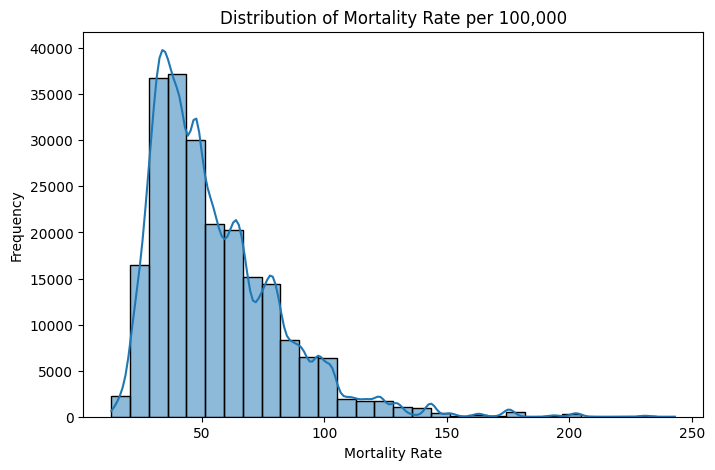

In [19]:
df_merged['mortality_rate'] = df_merged['Deaths'] / df_merged['Population'] * 100000

plt.figure(figsize=(8, 5))
sns.histplot(df_merged['mortality_rate'], bins=30, kde=True)
plt.title("Distribution of Mortality Rate per 100,000")
plt.xlabel("Mortality Rate")
plt.ylabel("Frequency")
plt.show()

In [20]:
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=df_merged['MedianFamilyIncome'], y=df_merged['mortality_rate'])
# plt.title("Mortality Rate vs. Median Family Income")
# plt.xlabel("Median Family Income ($)")
# plt.ylabel("Mortality Rate per 100,000")
# plt.show()


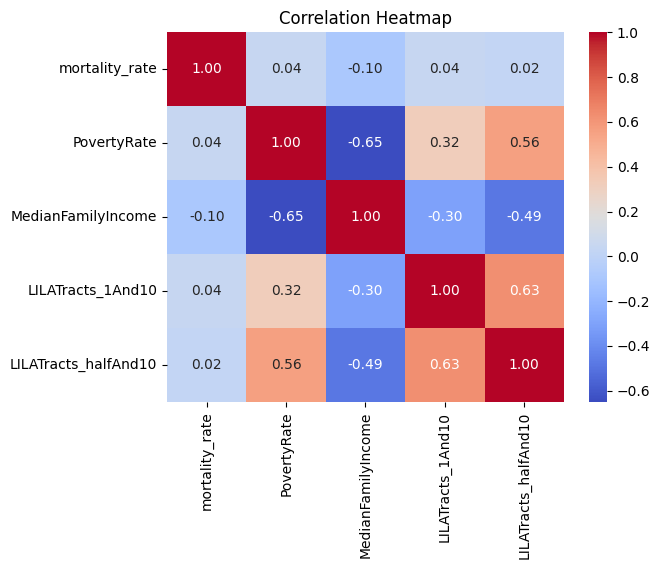

In [21]:
relevant_columns = ['mortality_rate', 'PovertyRate', 'MedianFamilyIncome', 'LILATracts_1And10', 'LILATracts_halfAnd10']
sns.heatmap(df_merged[relevant_columns].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

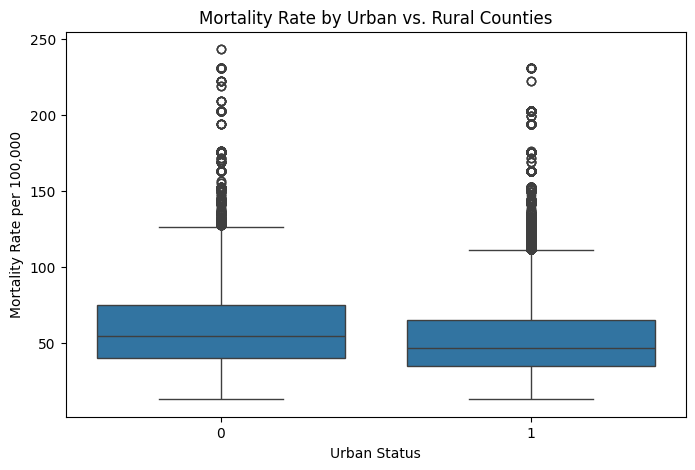

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_merged['Urban'], y=df_merged['mortality_rate'])
plt.title("Mortality Rate by Urban vs. Rural Counties")
plt.xlabel("Urban Status")
plt.ylabel("Mortality Rate per 100,000")
plt.show()

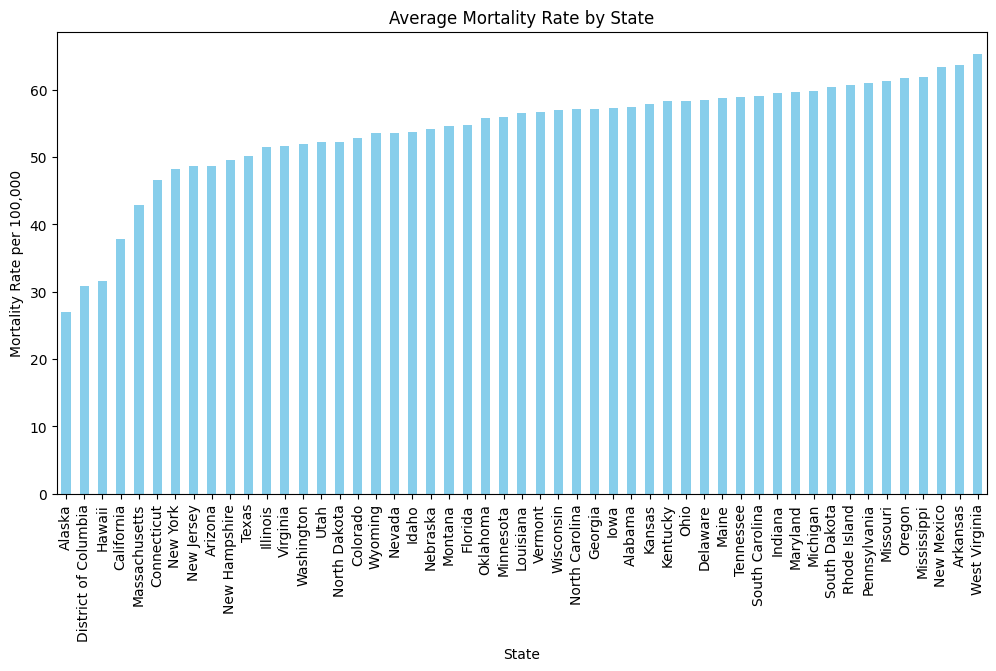

In [23]:
plt.figure(figsize=(12, 6))
state_avg = df_merged.groupby('State')['mortality_rate'].mean().sort_values()
state_avg.plot(kind='bar', color='skyblue')
plt.title("Average Mortality Rate by State")
plt.xlabel("State")
plt.ylabel("Mortality Rate per 100,000")
plt.xticks(rotation=90)
plt.show()

### Adam EDA

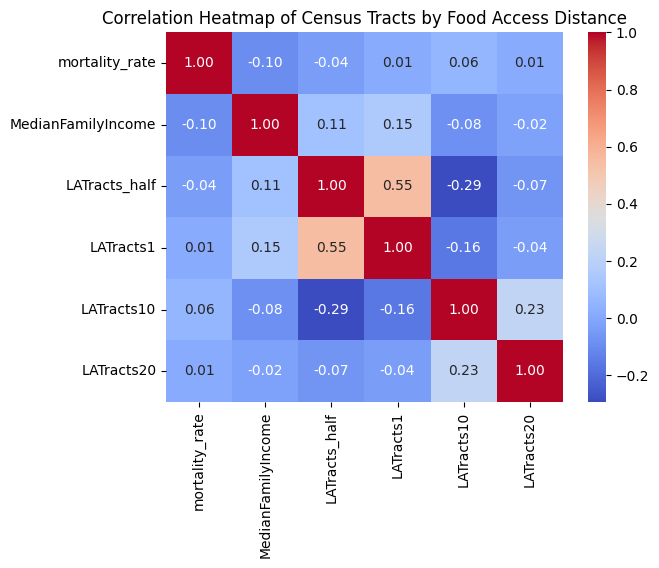

In [38]:
relevant_columns = ['mortality_rate', 'MedianFamilyIncome',
                     'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20']
sns.heatmap(df_merged[relevant_columns].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Census Tracts by Food Access Distance")
plt.show()

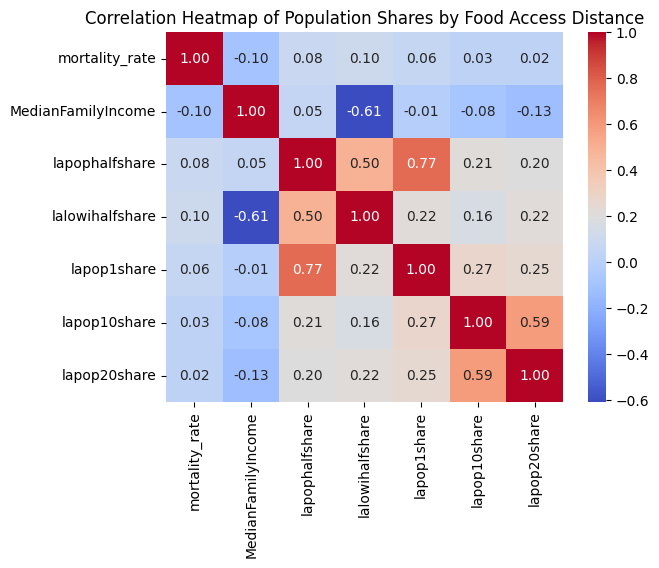

In [37]:
relevant_columns = ['mortality_rate', 'MedianFamilyIncome',
                     'lapophalfshare', 'lalowihalfshare', 'lapop1share', 'lapop10share', 'lapop20share']
sns.heatmap(df_merged[relevant_columns].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Population Shares by Food Access Distance")
plt.show()

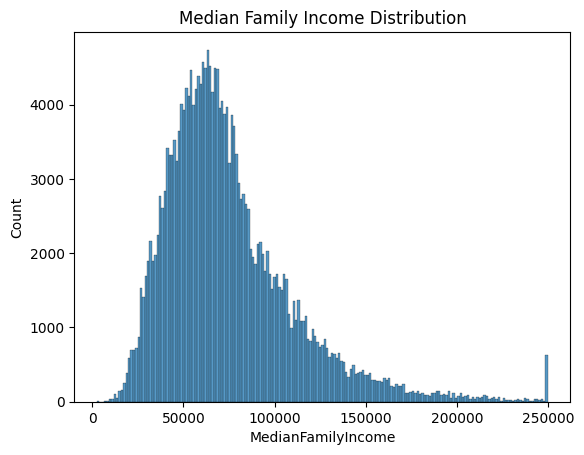

In [42]:
sns.histplot(df_merged['MedianFamilyIncome'])
plt.title('Median Family Income Distribution')
plt.show()

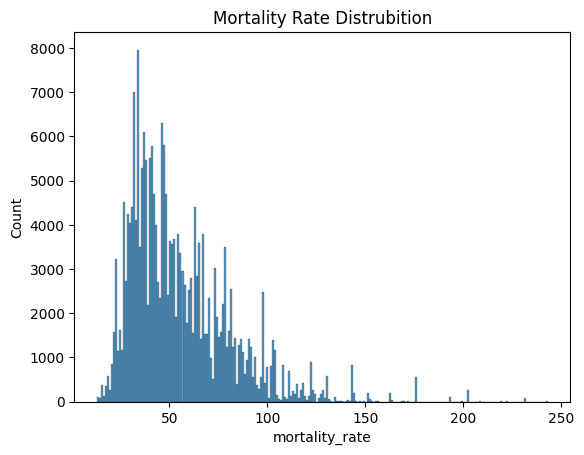

In [ ]:
sns.histplot(df_merged['mortality_rate'])
plt.title('Mortality Rate Distrubition')
plt.show()

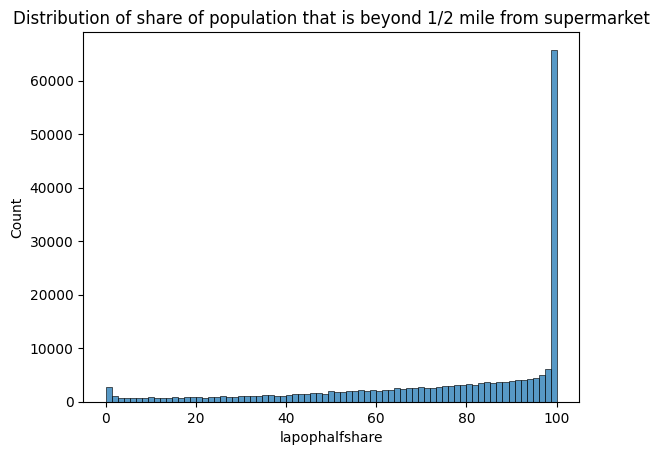

In [44]:
sns.histplot(df_merged['lapophalfshare'])
plt.title('Distribution of share of population that is beyond 1/2 mile from supermarket')
plt.show()

In [51]:
df_merged['lapophalfshare'].value_counts().sort_values(ascending=False)

lapophalfshare
0.000000      689
88.096099      24
67.565252      24
100.000000     24
100.000000     24
             ... 
20.145446       1
79.054832       1
77.315257       1
74.375149       1
100.000000      1
Name: count, Length: 65501, dtype: int64

In [ ]:
df_clean = df_merged.dropna(subset=['mortality_rate', 'lapophalfshare'])

# Compute Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df_clean['mortality_rate'], df_clean['lapophalfshare'])

print(f"Pearson Correlation: {corr}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05  # Common significance level (5%)
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")


Pearson Correlation: 0.08042788458657642
P-value: 9.968464013006474e-307
The correlation is statistically significant.


In [70]:
df_clean = df_merged.dropna(subset=['mortality_rate', 'MedianFamilyIncome'])

# Compute Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df_clean['mortality_rate'], df_clean['MedianFamilyIncome'])

print(f"Pearson Correlation: {corr}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05  # Common significance level (5%)
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")

Pearson Correlation: -0.09505001184637445
P-value: 0.0
The correlation is statistically significant.
